In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi
plt.rcParams['font.family'] = 'Noto Sans CJK JP'
plt.rcParams["font.size"] = 18

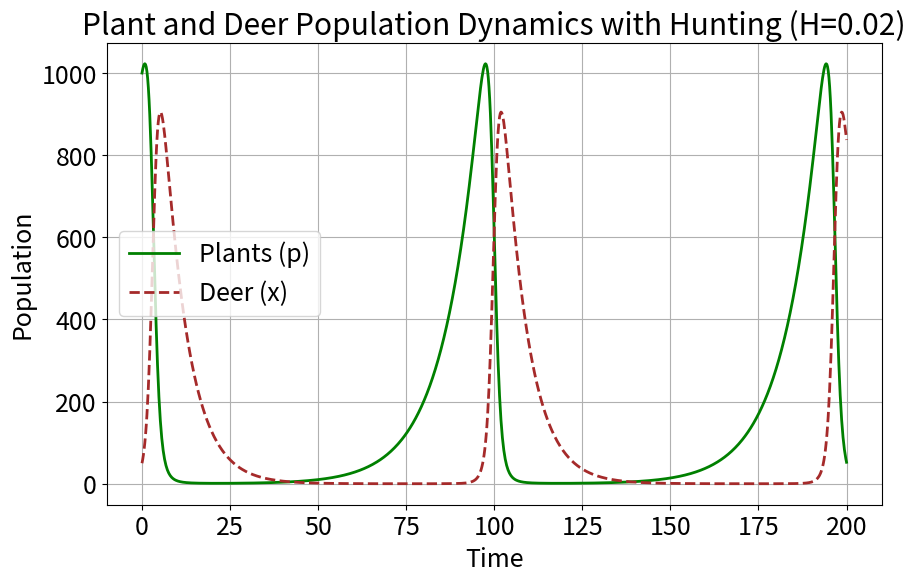

In [46]:
# パラメータの設定（狩猟効果 H を追加）
r = 0.1      # 植物の成長率
K = 1e8     # 植物の収容力
alpha = 0.001 # シカの摂食率
beta = 0.001   # シカの成長効率
gamma = 0.05 # シカの自然死亡率
H = 0.1     # 狩猟率（ここを変えて効果を調整可能）

# 微分方程式の定義
def ecosystem_with_hunting(state, t):
    p, x = state  # p:植物の個体数, x:シカの個体数
    dpdt = r * p * (1 - p / K) - alpha * p * x
    dxdt = beta * p * x - gamma * x - H * x
    return [dpdt, dxdt]

# 初期条件
p0 = 1000  # 植物の初期個体数
x0 = 50   # シカの初期個体数
initial_state = [p0, x0]

# 時間範囲の設定
t = np.linspace(0, 200, 1000)  # 0から200までの時間範囲（細かく分割）

# 微分方程式の数値解法


solution_with_hunting = spi.odeint(ecosystem_with_hunting, initial_state, t)
p_with_hunting, x_with_hunting = solution_with_hunting.T  # 結果を植物とシカに分ける

# グラフの描画
plt.figure(figsize=(10, 6))
plt.plot(t, p_with_hunting, label="Plants (p)", linestyle='-', linewidth=2, color='green')
plt.plot(t, x_with_hunting, label="Deer (x)", linestyle='--', linewidth=2, color='brown')
plt.title("Plant and Deer Population Dynamics with Hunting (H=0.02)")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend()
plt.grid()
plt.show()